# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, Data/wine.mat

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a
1. Load the data into Python using the scipy.io.loadmat() function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. 
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. 
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the scipy.stats.zscore() to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function matplotlib.pyplot.subplots() to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


In [5]:
from scipy.io import loadmat
from scipy.stats import zscore, pearsonr
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('ggplot')

In [6]:
##Answer to question 2.1.1

#load data
wine = loadmat('Data/wine.mat')['X']
swine = zscore(wine) #s for standardized

fixed_acid = wine[:,0]
vol_acid = wine[:,1]
citric_acid = wine[:,2]
residual_sugar = wine[:,3]
chlorides = wine[:,4]
free_sulfur_dioxide = wine[:,5]
total_sulfur_dioxide = wine[:,6]
dens = wine[:,7]
pH = wine[:,8]
sulphates = wine[:,9]
alc = wine[:,10]
quality_score = wine[:,11]

# remove outliers
vol_acid_purged = [x for x in vol_acid if x <= 20]
dens_purged = [x for x in dens if x <= 10]
alc_purged = [x for x in alc if x <= 100]

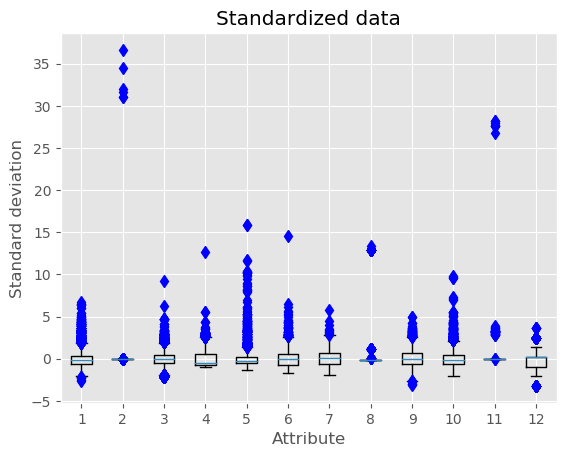

In [7]:
plt.boxplot(swine, 0, 'bd')
plt.xlabel("Attribute")
plt.ylabel("Standard deviation")
plt.title("Standardized data")
plt.show()

10 times larger than the highest expected value seems to be a decent heuristic for outlier removal; it is, however, by no means perfect. If you look closely at attributes 2, 8 and 11, that is volatile acidity, density and alcohol, some outliers still seem to remain in the dataset. 35 standard deviations away from the mean seem very high, but are technically possible (although extremely rare). Those datapoints should be inspected again and considered for outlier removal.

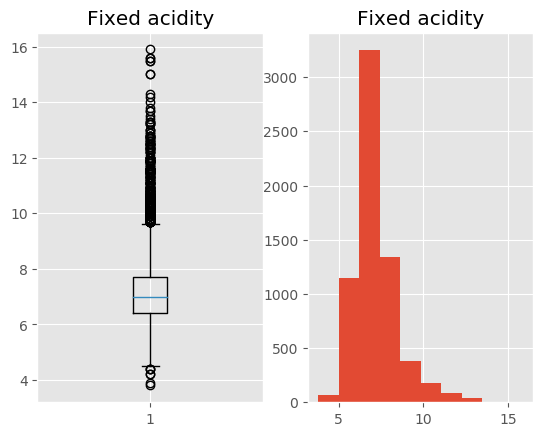

In [8]:
plt.subplot(1,2,1)
plt.boxplot(fixed_acid)
plt.title('Fixed acidity')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(fixed_acid)
plt.title('Fixed acidity')
plt.grid(True)

plt.show()

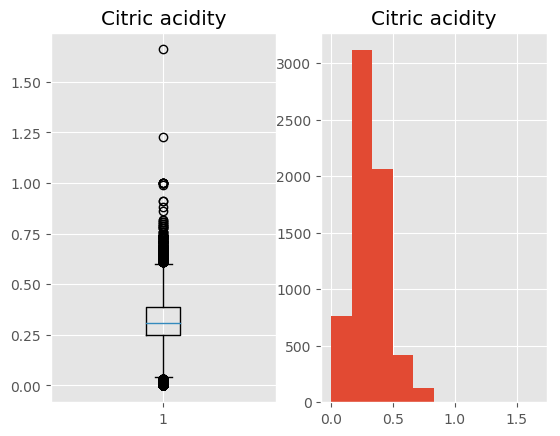

In [9]:
plt.subplot(1,2,1)
plt.boxplot(citric_acid)
plt.title('Citric acidity')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(citric_acid)
plt.title('Citric acidity')
plt.grid(True)

plt.show()

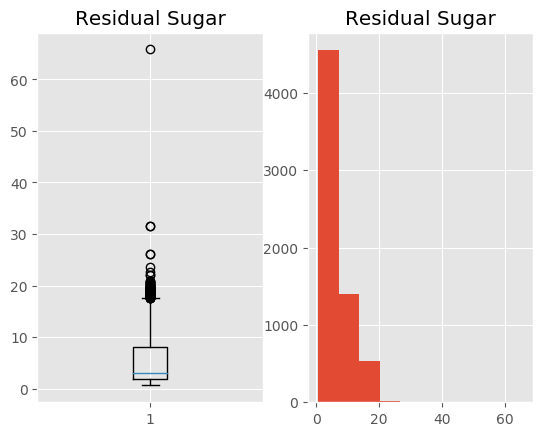

In [10]:
plt.subplot(1,2,1)
plt.boxplot(residual_sugar)
plt.title('Residual Sugar')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(residual_sugar)
plt.title('Residual Sugar')
plt.grid(True)

plt.show()

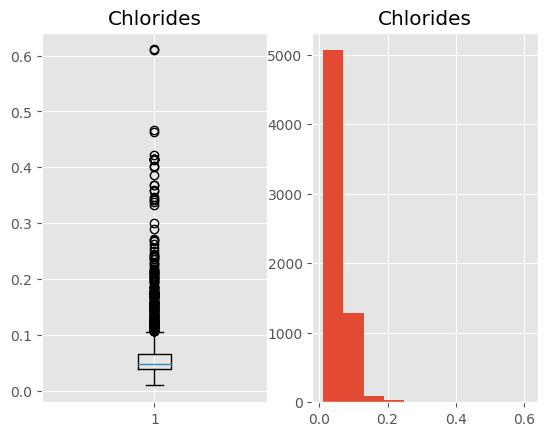

In [11]:
plt.subplot(1,2,1)
plt.boxplot(chlorides)
plt.title('Chlorides')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(chlorides)
plt.title('Chlorides')
plt.grid(True)

plt.show()

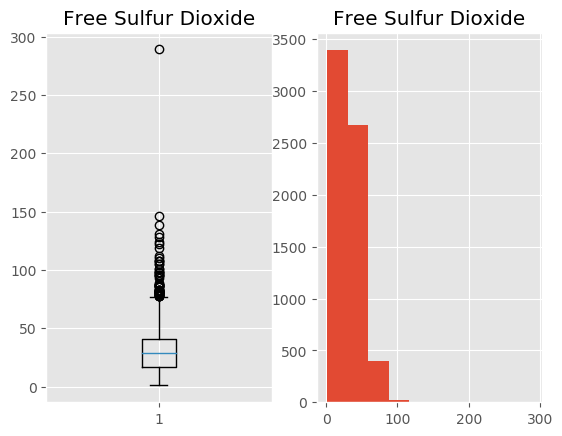

In [12]:
plt.subplot(1,2,1)
plt.boxplot(free_sulfur_dioxide)
plt.title('Free Sulfur Dioxide')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(free_sulfur_dioxide)
plt.title('Free Sulfur Dioxide')
plt.grid(True)

plt.show()

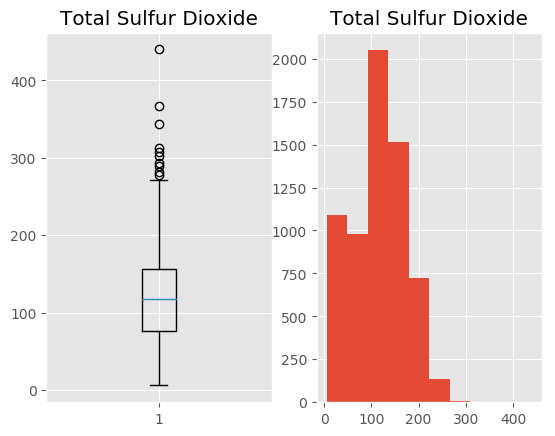

In [13]:
plt.subplot(1,2,1)
plt.boxplot(total_sulfur_dioxide)
plt.title('Total Sulfur Dioxide')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(total_sulfur_dioxide)
plt.title('Total Sulfur Dioxide')
plt.grid(True)

plt.show()

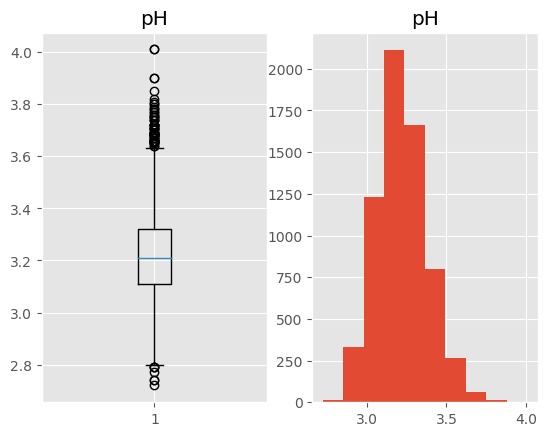

In [14]:
plt.subplot(1,2,1)
plt.boxplot(pH)
plt.title('pH')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(pH)
plt.title('pH')
plt.grid(True)

plt.show()

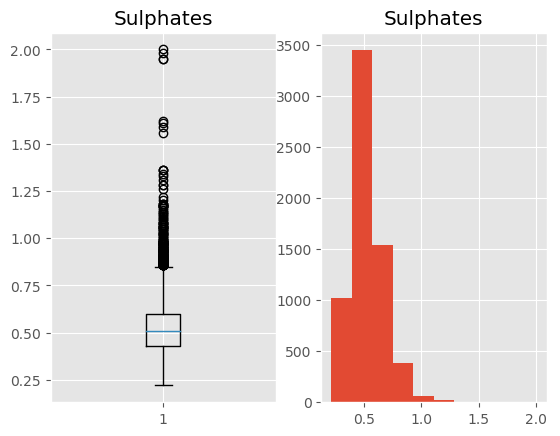

In [15]:
plt.subplot(1,2,1)
plt.boxplot(sulphates)
plt.title('Sulphates')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(sulphates)
plt.title('Sulphates')
plt.grid(True)

plt.show()

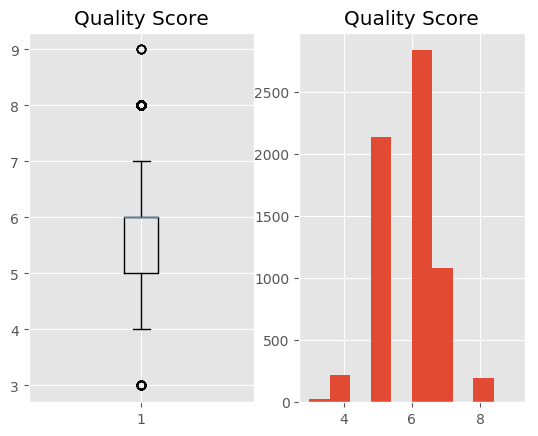

In [16]:
plt.subplot(1,2,1)
plt.boxplot(quality_score)
plt.title('Quality Score')
plt.grid(True)
plt.subplot(1,2,2)
plt.hist(quality_score)
plt.title('Quality Score')
plt.grid(True)

plt.show()

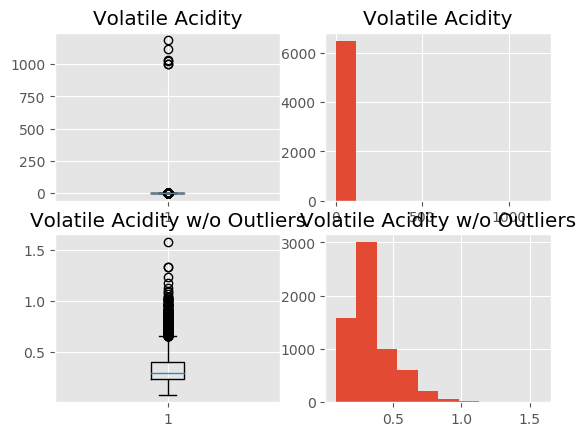

In [17]:
plt.subplot(2,2,1)
plt.boxplot(vol_acid)
plt.title('Volatile Acidity')
plt.grid(True)
plt.subplot(2,2,2)
plt.hist(vol_acid)
plt.title('Volatile Acidity')
plt.grid(True)
plt.subplot(2,2,3)
plt.boxplot(vol_acid_purged)
plt.title('Volatile Acidity w/o Outliers')
plt.grid(True)
plt.subplot(2,2,4)
plt.hist(vol_acid_purged)
plt.title('Volatile Acidity w/o Outliers')
plt.grid(True)

plt.show()

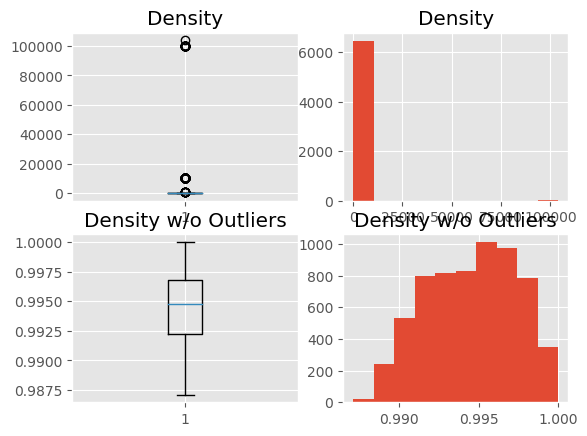

In [18]:
plt.subplot(2,2,1)
plt.boxplot(dens)
plt.title('Density')
plt.grid(True)
plt.subplot(2,2,2)
plt.hist(dens)
plt.title('Density')
plt.grid(True)
plt.subplot(2,2,3)
plt.boxplot(dens_purged)
plt.title('Density w/o Outliers')
plt.grid(True)
plt.subplot(2,2,4)
plt.hist(dens_purged)
plt.title('Density w/o Outliers')
plt.grid(True)

plt.show()

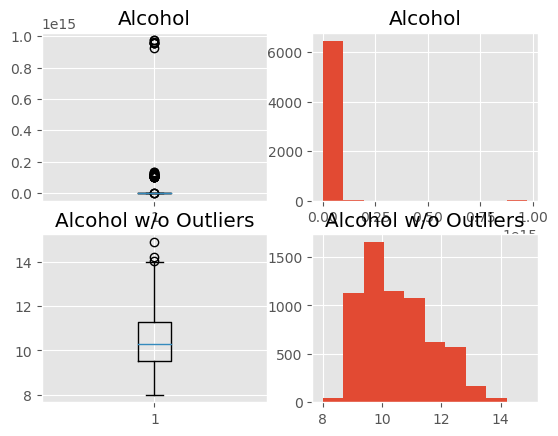

In [19]:
plt.subplot(2,2,1)
plt.boxplot(alc)
plt.title('Alcohol')
plt.grid(True)
plt.subplot(2,2,2)
plt.hist(alc)
plt.title('Alcohol')
plt.grid(True)
plt.subplot(2,2,3)
plt.boxplot(alc_purged)
plt.title('Alcohol w/o Outliers')
plt.grid(True)
plt.subplot(2,2,4)
plt.hist(alc_purged)
plt.title('Alcohol w/o Outliers')
plt.grid(True)

plt.show()

> 2.1.2 Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine?
+ *You can calculate the correlation coefficient using the scipy.stats.pearsonr() function to measure the strength of association.*

p =  5.874849264988259e-10  r =  -0.07674320790961987


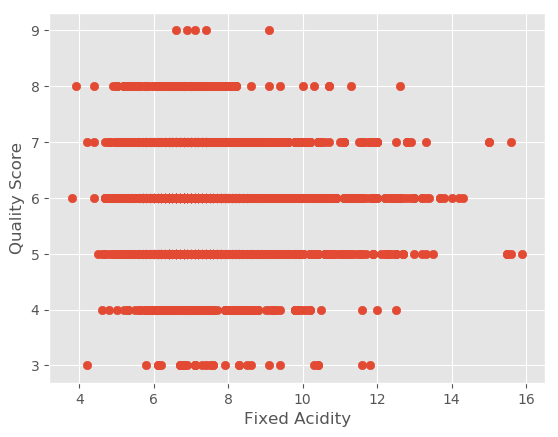

In [20]:
##Answer to question 2.1.2

r, p = pearsonr(quality_score, fixed_acid)
print ('p = ',p,' r = ',r)

plt.scatter(fixed_acid, quality_score)
plt.xlabel("Fixed Acidity")
plt.ylabel("Quality Score")
plt.grid(True)

P value is signigicant but does not matter with such a small effect size r. Visually, no correlation can be seen.

p =  7.996938704820169e-102  r =  -0.2613314313348174


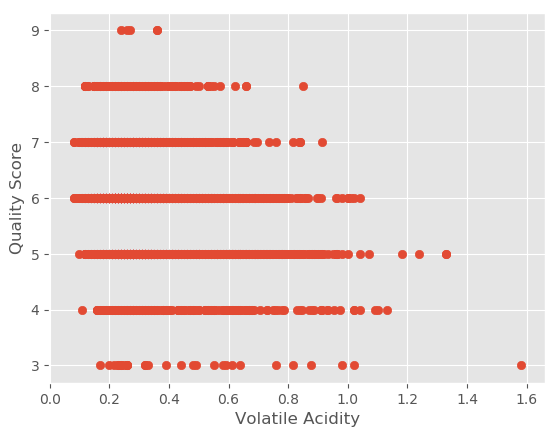

In [21]:
quality_score_purged = quality_score[np.where([x <= 20 for x in vol_acid])]

r , p = pearsonr(quality_score_purged, vol_acid_purged)
print ('p = ',p,' r = ',r)

plt.scatter(vol_acid_purged, quality_score_purged)
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality Score")
plt.grid(True)

There is at least a significant negative relationship with a tiny effect. It is nothing serious; the more volatile acidity, the more certain you are the quality is poor. However, there are tons of low acidic wines that are also of poor quality.

p =  5.001763955780186e-12  r =  0.08553171718367848


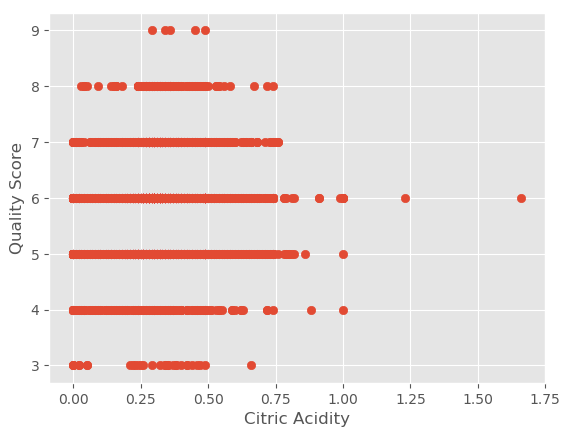

In [22]:
r, p = pearsonr(quality_score, citric_acid)
print ('p = ',p,' r = ',r)

plt.scatter(citric_acid, quality_score)
plt.xlabel("Citric Acidity")
plt.ylabel("Quality Score")
plt.grid(True)

There is a significant effect, which is too little to be taken seriously (r < 0.1).

p =  0.0028710245842621415  r =  -0.03698048458576944


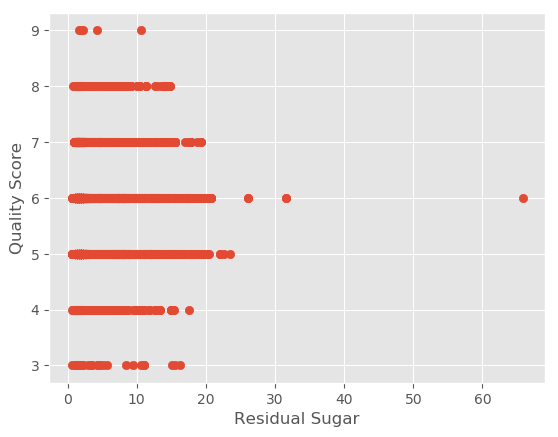

In [23]:
r, p = pearsonr(quality_score, residual_sugar)
print ('p = ',p,' r = ',r)

plt.scatter(residual_sugar, quality_score)
plt.xlabel("Residual Sugar")
plt.ylabel("Quality Score")
plt.grid(True)

A sigificant but tiny negative correlation.

p =  5.316452330932208e-60  r =  -0.200665500435102


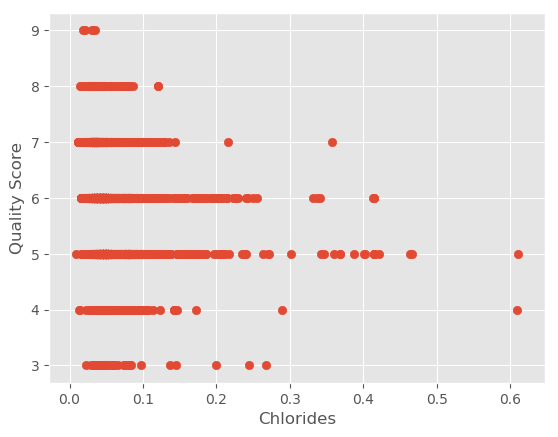

In [24]:
r, p = pearsonr(quality_score, chlorides)
print ('p = ',p,' r = ',r)

plt.scatter(chlorides, quality_score)
plt.xlabel("Chlorides")
plt.ylabel("Quality Score")
plt.grid(True)

Probably the first significant small effect. There is a small (r = -0.2) negative correlation between chlorides and wine quality.

p =  7.708444502629265e-06  r =  0.055463058616632664


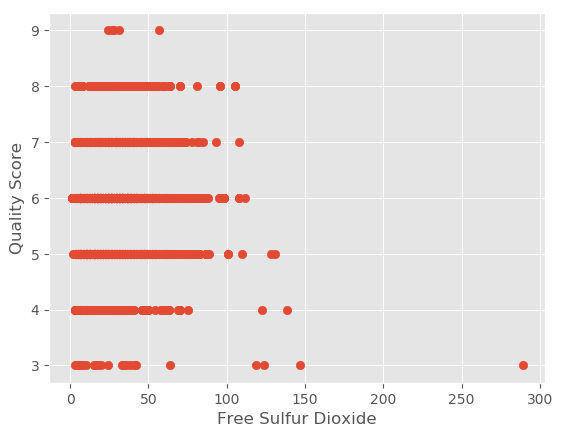

In [25]:
r, p = pearsonr(quality_score, free_sulfur_dioxide)
print ('p = ',p,' r = ',r)

plt.scatter(free_sulfur_dioxide, quality_score)
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Quality Score")
plt.grid(True)

Significant but tiny effect. No real correlation.

p =  0.0008480397388751994  r =  -0.0413854538556088


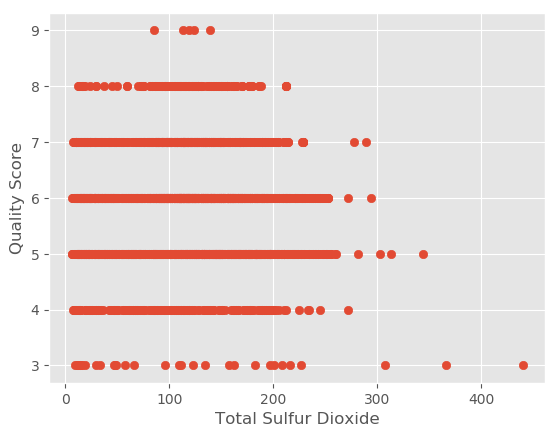

In [26]:
r, p = pearsonr(quality_score, total_sulfur_dioxide)
print ('p = ',p,' r = ',r)

plt.scatter(total_sulfur_dioxide, quality_score)
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Quality Score")
plt.grid(True)

Effect size too little to be serious.

p =  9.20571107136724e-151  r =  -0.31960928769639463


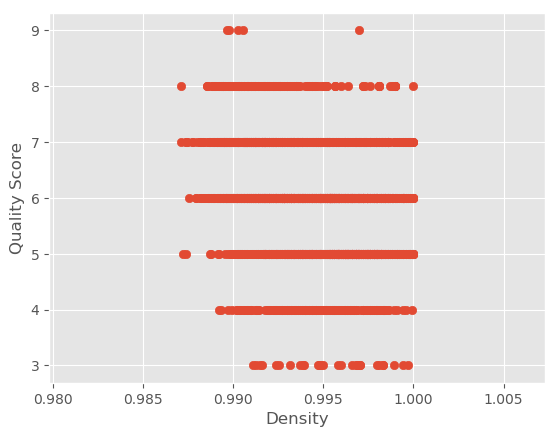

In [27]:
quality_score_purged = quality_score[np.where([x <= 10 for x in dens])]

r, p = pearsonr(quality_score_purged, dens_purged)
print ('p = ',p,' r = ',r)

plt.scatter(dens_purged, quality_score_purged)
plt.xlabel("Density")
plt.ylabel("Quality Score")
plt.grid(True)

The second significant and serious negative correlation, albeit small with r = -0.32. Nevertheless, This is enough to say that as density increases, wine quality tends to decrease. This is not very surprising; I'm by no means a connoisseur, but from personal experience, I too like it when my drinks are smooth.

p =  0.11593102710198623  r =  0.01950570371443586


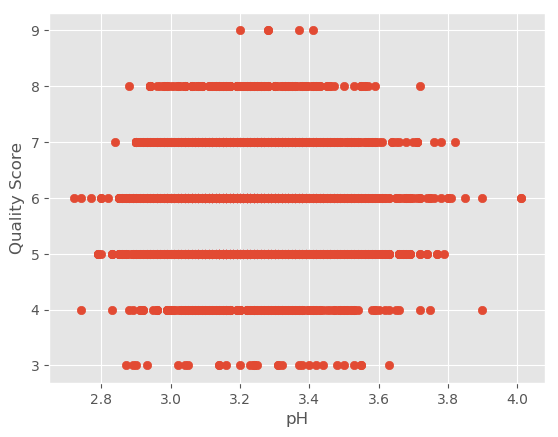

In [28]:
r, p = pearsonr(quality_score, pH)
print ('p = ',p,' r = ',r)

plt.scatter(pH, quality_score)
plt.xlabel("pH")
plt.ylabel("Quality Score")
plt.grid(True)

Again, effect too small

p =  0.0019180785200657669  r =  0.03848544587651445


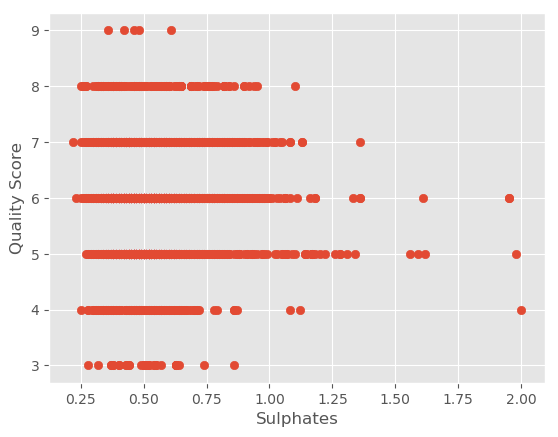

In [29]:
r, p = pearsonr(quality_score, sulphates)
print ('p = ',p,' r = ',r)

plt.scatter(sulphates, quality_score)
plt.xlabel("Sulphates")
plt.ylabel("Quality Score")
plt.grid(True)

Once again, the effect size r is too small to be taken seriously.

p =  1.37749325816695e-310  r =  0.4442849381873828


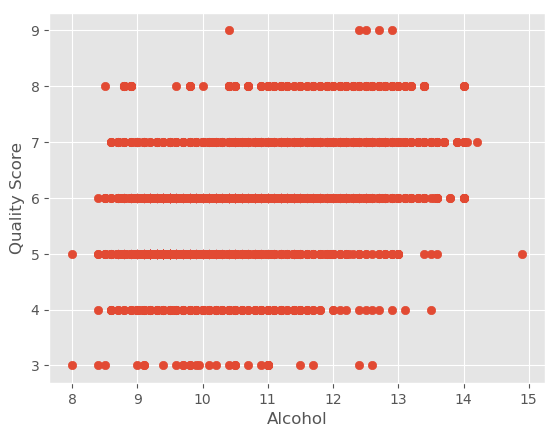

In [30]:
quality_score_purged = quality_score[np.where([x <= 100 for x in alc])]

r, p = pearsonr(quality_score_purged, alc_purged)
print ('p = ',p,' r = ',r)

plt.scatter(alc_purged, quality_score_purged)
plt.xlabel("Alcohol")
plt.ylabel("Quality Score")
plt.grid(True)

There seems to be a moderate significant effect size, with the quality tending to increase as the percentage of alcohol increases. At this point, one might genuinely wonder if the sommeliers just like to get drunk, and if this is the reason they rate strong wine so high..

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now,
using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4. 
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in
different colors. Add a legend to clarify which digit is shown in which color.

> 
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


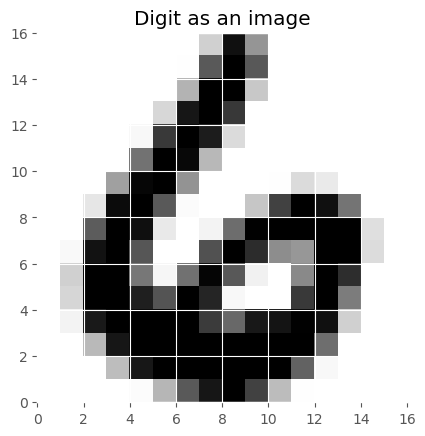

In [31]:
## Example code:
#------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape

# Index of the digit to display
i = 0

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

# Visualize the i'th digit as an image
plt.subplot(1,1,1);
I = reshape(X[i,:],(16,16))
plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
plt.title('Digit as an image');
plt.show()
#------------------------------------------------

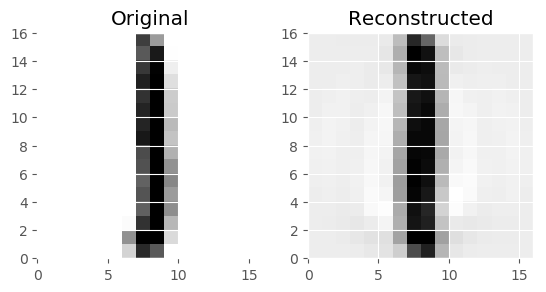

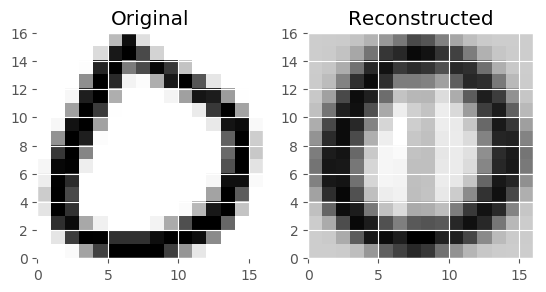

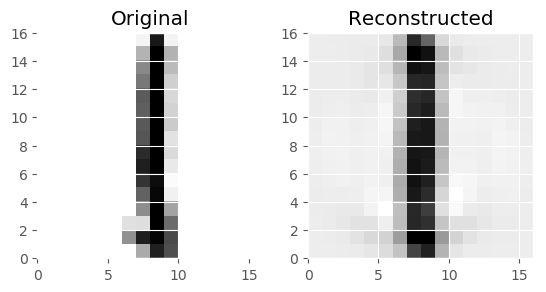

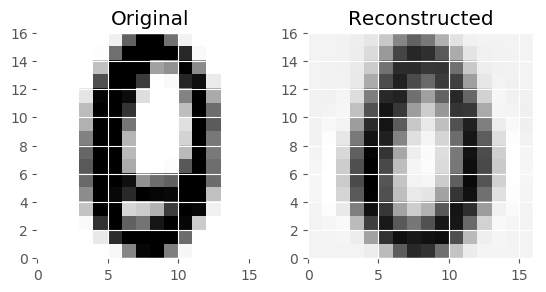

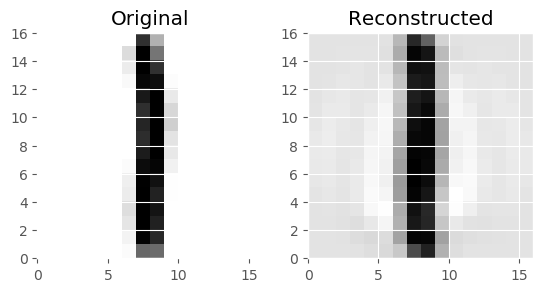

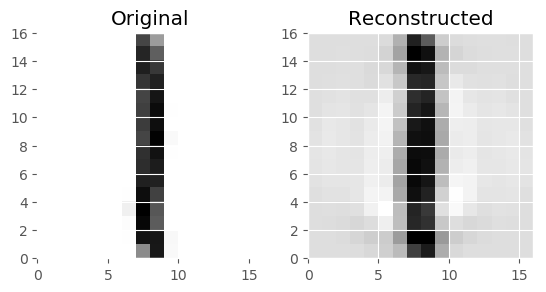

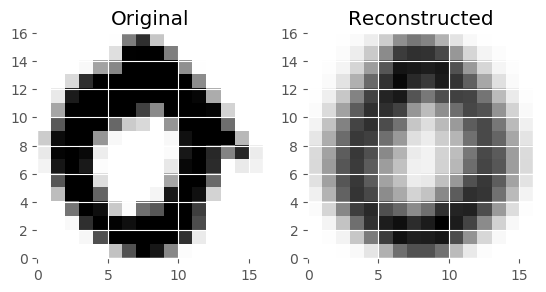

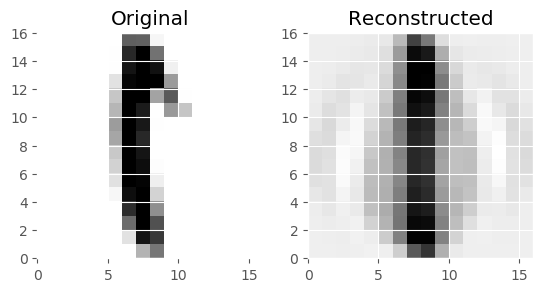

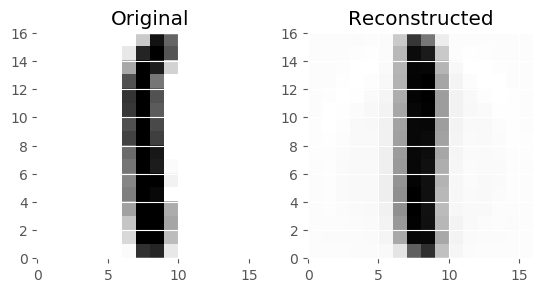

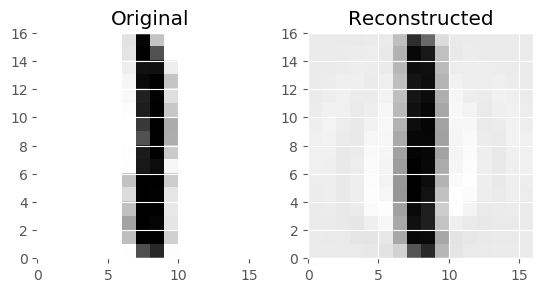

In [43]:
##Answer to question 2.2.1

# drop all but digits that are 0 or 1
traindata = traindata[traindata[:,0] < 2]

# split into data and indices
X = traindata[:,1:]
y = traindata[:,0]
train = np.matrix(X)

df = pd.DataFrame(train)
mean = np.array(df.mean())

Y = train - mean
U,S,VT = np.linalg.svd(Y)
V = VT.T
PC1 = np.array(Y@V[:,0]).ravel()
PC2 = np.array(Y@V[:,1]).ravel()
PC3 = np.array(Y@V[:,2]).ravel()
PC4 = np.array(Y@V[:,3]).ravel()

Xpca = Y@V[:,:4]
Xpca = np.matrix(Xpca)

W = Xpca @ V[:,:4].T + mean

for j in range(10):
    plt.subplot(1,2,1);
    I = reshape(train[j,:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Original');
    
    plt.subplot(1,2,2);
    I = reshape(W[j,:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Reconstructed');
    
    plt.show()

/home/tingo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


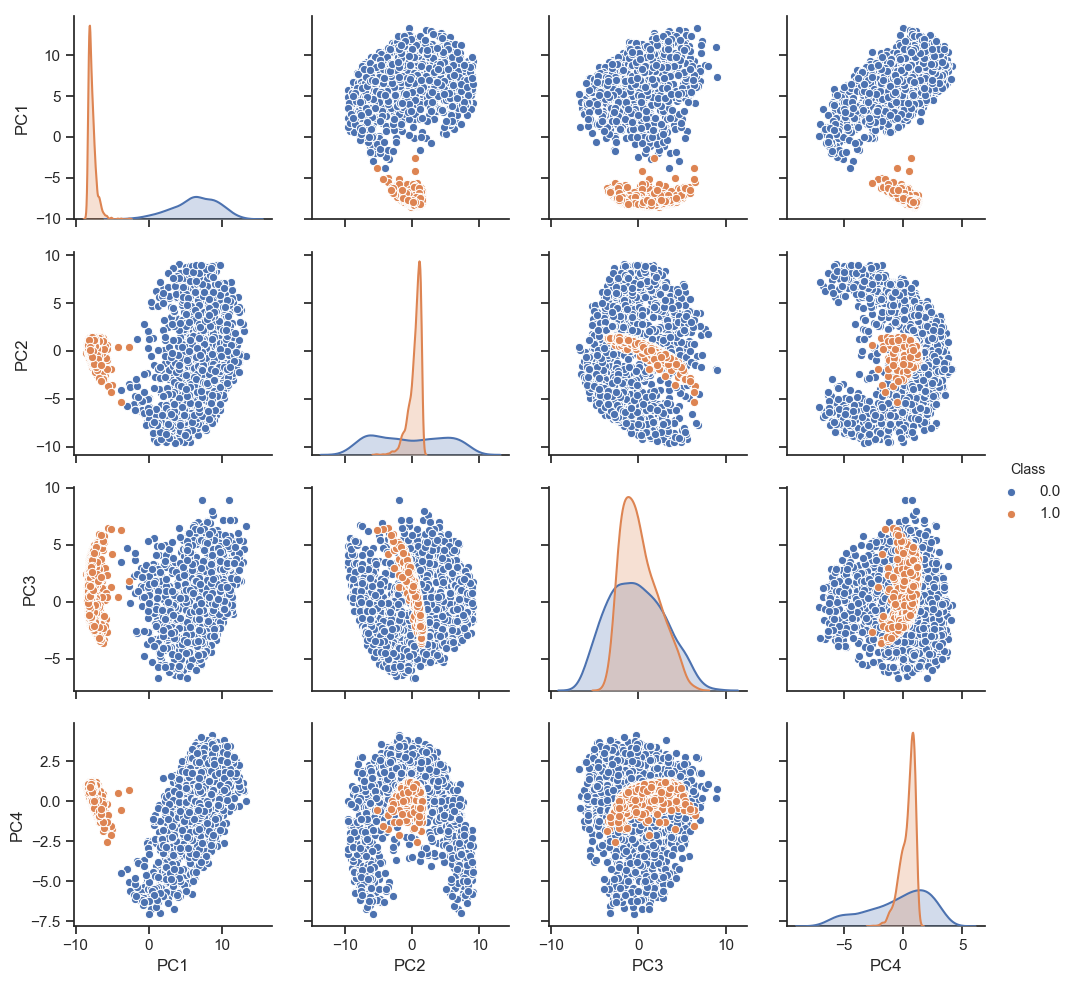

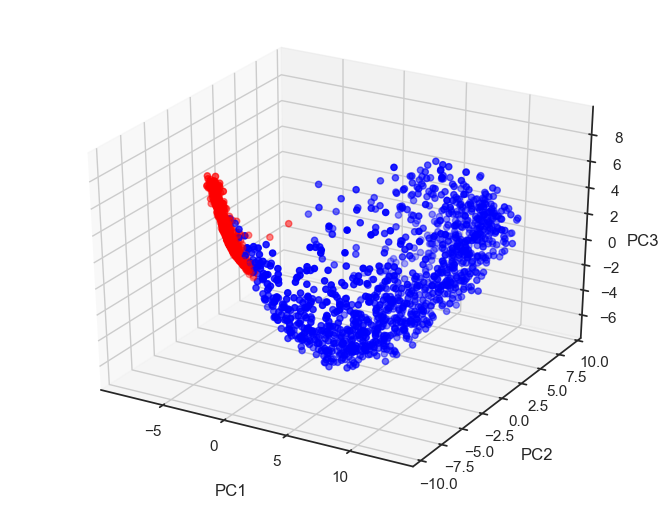

In [44]:
labels = y[y < 2]

data = pd.concat([pd.DataFrame(labels), pd.DataFrame(Xpca)], axis=1)
test = pd.DataFrame(Xpca)
data.columns = ['Class','PC1', 'PC2', 'PC3', 'PC4']

sns.set(style="ticks")
sns.pairplot(data, hue = 'Class',  vars=["PC1", "PC2", "PC3", "PC4"])

fig = plt.figure()
ax = Axes3D(fig)
colors = np.array(["blue"] * len(Y))
colors[np.where(y[np.where(y<2)]==1)[0]] = "red"
ax.scatter(PC1, PC2, PC3,c=colors)
xLabel = ax.set_xlabel('\nPC1', linespacing=3.2)
yLabel = ax.set_ylabel('\nPC2', linespacing=3.1)
zLabel = ax.set_zlabel('\nPC3', linespacing=3.4)

The 1s are much better reconstructed than the 0s. Both still look fine overall. Interestingly, there is a hue of the other digit in every image, in the background (like a watermark). I believe this to be a side effect of mean centering the data. The fact that 1s are reconstructed better is probably due to them being much more similar and having much less variance between them, compared to the poorer reconstructed 0s, that share comprise the majority of the variance captured by the principal components.

## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [45]:
##Answer to question 2.3.1

aliens = np.array([2,3,6,8,11,18])

mean = np.mean(aliens)
std = np.std(aliens)

print ('mean =', mean, '      ', 'Standard Deviation =',  std)

mean = 8.0        Standard Deviation = 5.385164807134504


> ii. List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [46]:
##Answer to question 2.3.2

import itertools

for each in itertools.combinations(aliens,2):
    print (each, 'mean: ', np.mean(each))
    
print('\n')    

for each in itertools.combinations(aliens,4):
    print (each, 'mean: ', np.mean(each))    

(2, 3) mean:  2.5
(2, 6) mean:  4.0
(2, 8) mean:  5.0
(2, 11) mean:  6.5
(2, 18) mean:  10.0
(3, 6) mean:  4.5
(3, 8) mean:  5.5
(3, 11) mean:  7.0
(3, 18) mean:  10.5
(6, 8) mean:  7.0
(6, 11) mean:  8.5
(6, 18) mean:  12.0
(8, 11) mean:  9.5
(8, 18) mean:  13.0
(11, 18) mean:  14.5


(2, 3, 6, 8) mean:  4.75
(2, 3, 6, 11) mean:  5.5
(2, 3, 6, 18) mean:  7.25
(2, 3, 8, 11) mean:  6.0
(2, 3, 8, 18) mean:  7.75
(2, 3, 11, 18) mean:  8.5
(2, 6, 8, 11) mean:  6.75
(2, 6, 8, 18) mean:  8.5
(2, 6, 11, 18) mean:  9.25
(2, 8, 11, 18) mean:  9.75
(3, 6, 8, 11) mean:  7.0
(3, 6, 8, 18) mean:  8.75
(3, 6, 11, 18) mean:  9.5
(3, 8, 11, 18) mean:  10.0
(6, 8, 11, 18) mean:  10.75


> iii. Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [47]:
##Answer to question 2.3.3

def combos(x,y):
    c = []
    for each in itertools.combinations(x,y):
        c.append(np.mean(each))
    return np.array(c)
        
a = np.mean(combos(aliens,2))
b = np.mean(combos(aliens,4))

c= np.std(combos(aliens,2))
d= np.std(combos(aliens,4))

print (a, b, c, d)  

8.0 8.0 3.40587727318528 1.70293863659264


> iv. Verify the Central Limit Theorem: (i) compare the population
mean with the mean of both sample means; (ii) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

In [48]:
import math

print (mean == a == b)

print ((std/(math.sqrt(2)))*math.sqrt(0.8) == c)

print ((std/(math.sqrt(4)))*math.sqrt(0.4) == d)

True
True
True


The mean of the whole population and the means of the sample means are equal, both 8.
The standard deviation divided by the square root of the sample size is the same as the standard deviation of both sample means. The central limit theorem can be verified.


> v. Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

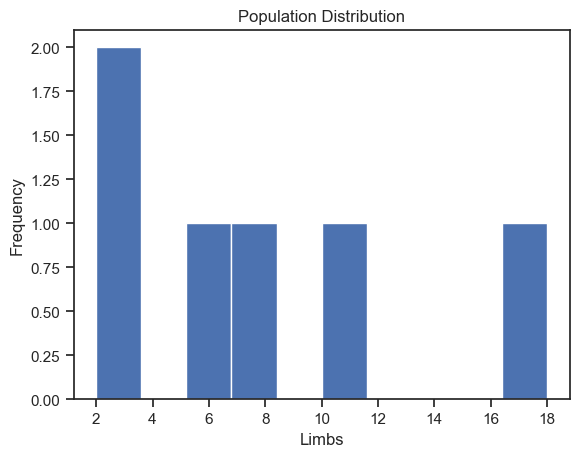

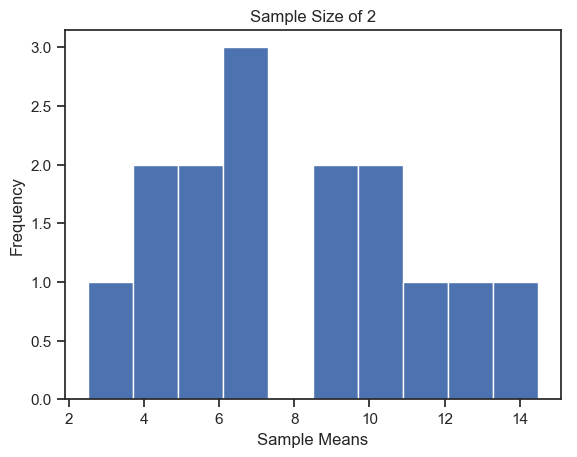

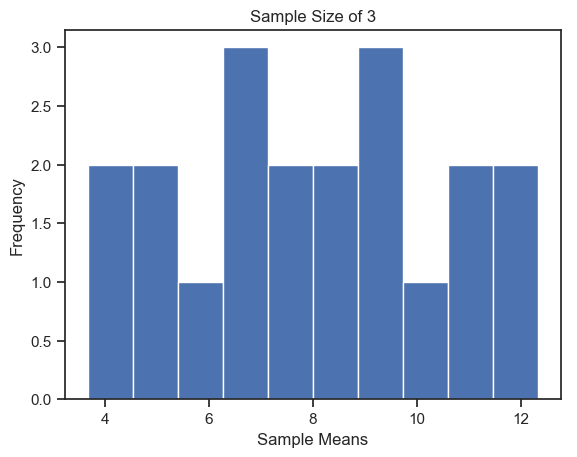

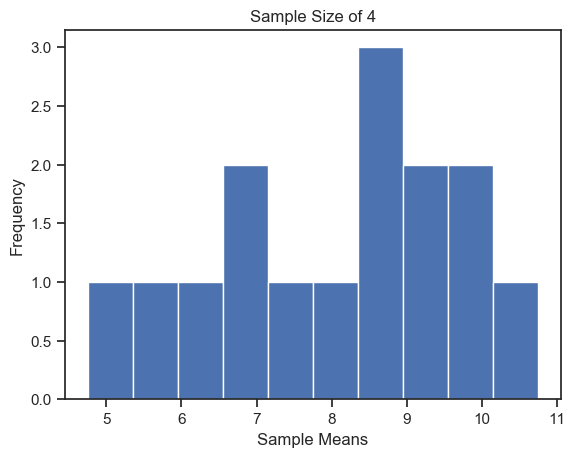

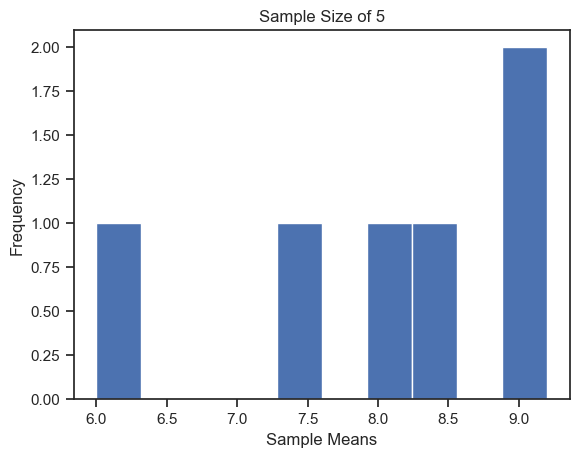

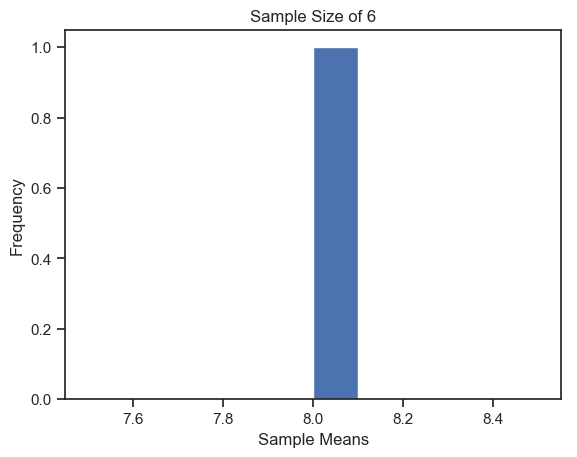

In [49]:
##Answer to question 2.3.5

plt.hist(aliens)
plt.title("Population Distribution")
plt.xlabel("Limbs")
plt.ylabel("Frequency")
plt.show()

plt.hist(combos(aliens,2))
plt.title("Sample Size of 2")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()

plt.hist(combos(aliens,3))
plt.title("Sample Size of 3")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()

plt.hist(combos(aliens,4))
plt.title("Sample Size of 4")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()

plt.hist(combos(aliens,5))
plt.title("Sample Size of 5")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()

plt.hist(combos(aliens,6))
plt.title("Sample Size of 6")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()

As the sample size increases, the distribution of the sample means first approaches a normal distribution and eventually approaches the true mean.